In [1]:
from typing import List, Optional, Union

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

import utils as u
from models import reina2016, rotationnality, rotagora2023, gora2021
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
# abbrs_d = tuple(f"D{i:02}" for i in range(1, 24))
# abbrs_m = tuple(f"M{i:02}" for i in range(1, 8))
# abbrs_p = tuple(f"P{i:02}" for i in range(1, 12))
# abbrs_r = tuple(f"R{i:02}" for i in range(1, 15))
# abbrs_s = tuple(f"S{i:02}" for i in range(1, 32))
# abbrs_t = tuple(f"T{l}" for l in "ABC")
# abbrs = abbrs_d + abbrs_m + abbrs_p + abbrs_r + abbrs_s + abbrs_t

abbrs = ("M01", "M02", "M03", "M04", "M05", "M06", "M07")
# abbrs += ("S01", "S02", "S03", "S04", "S05", "S06", "S07", "S08", "S09", "S10", "S21", "S22","S23", "S28", "S29", "S30", "S31")
# # abbrs += ("TB",)
# abbrs += ("R02", "R03", "R09")
# abbrs += ("D01", "D02", "D03", "D04", "D05", "D06", "D09", "D11", "D12", "D13", "D14", "D16", "D18", "D19", "D20", "D21", "D22")
# abbrs = ("S01", "S02", "S03", "S04", "S05", "S06", "S28", "S29", "S30", "S31")
# abbrs = ("S06", "S07", "S08", "S09", "S10", "S28", "S29", "S30", "S31")
# abbrs = (*abbrs, "D05", "D11", "D18", "D19", "D20", "D21", "D22")
# abbrs = ("M01", "M02", "M03", "M04", "M05", "M06", "M07", "D21")
# abbrs = ("D20", "D21", "D22")
# abbrs = ("R02", "R09", "R03", "S01", "S31")
colors = u.COLORS
cols = {a: colors[u.get_terrain(a)] for a in abbrs}

highlighted_abbrs = ("M03", "M04", "M05", "M06")
highlighted_abbrs = ("S23",)

abbrs = ("M01", "M02", "M03", "M04", "M05", "M06", "M07")
lin_abbrs = ("M01", "M02", "M07")
rot_abbrs = ("M03", "M04", "M05", "M06")


def add_terrain_legend(mpl_elem: Union[mpl.axes.Axes, mpl.figure.Figure], highlighted: Optional[List[str]] = None):
    legend_handles = [mpatches.Patch(color=col, label=lab) for lab, col in colors.items()]
    if highlighted is not None:
        legend_handles.extend([mpatches.Patch(color="xkcd:bright red", label=lab) for lab in highlighted])
    # mpl_elem.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0), loc="lower left")
    mpl_elem.legend(
        handles=legend_handles, ncol=len(colors), bbox_to_anchor=(0.5, -0.03), loc="upper center", title="Terrain"
    )


In [3]:
dfs = {}
for abbr in abbrs:
    preprocess(abbr, verbose=False)
    rot_df = rotationnality.rotationnality(abbr, verbose=False)
    reina_df = reina2016.reina2016(abbr, rot_df, verbose=False)
    rotagora_df = rotagora2023.rotagora2023(abbr, reina_df, verbose=False)
    dfs[abbr] = rotagora_df



M07: 100%|██████████| 195/195 [00:02<00:00, 87.95it/s] 


In [4]:

goradfs = {}
for abbr in abbrs:
    goradfs[abbr] = gora2021.gora2021(abbr, verbose=False)

M07: 100%|██████████| 195/195 [00:01<00:00, 108.69it/s]


In [5]:
model_name = rotagora2023.__MODEL_NAME__.lower()
figdir = u.get_figdir("summary", subdir=model_name)
model_name = rotagora2023.__MODEL_NAME__.title()


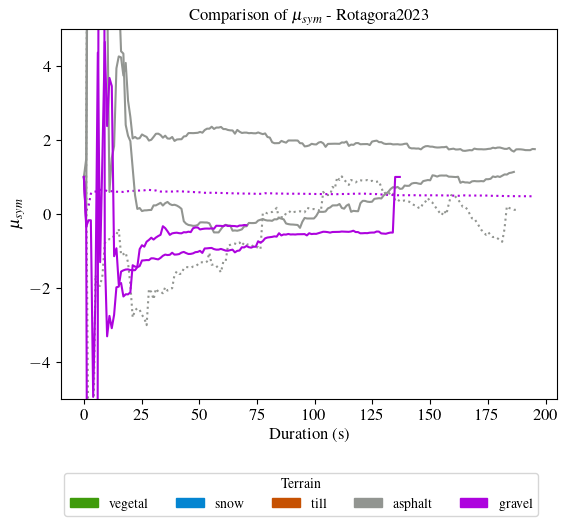

In [12]:
fig, ax = plt.subplots()

for abbr in lin_abbrs:
    col = cols[abbr]
    lstyle = ":" if abbr in lin_abbrs else "-"
    df = dfs[abbr]
    ax.plot(df.time_rel, df.m_sym, col, label=abbr, linestyle=lstyle)

for abbr in rot_abbrs:
    col = cols[abbr]
    lstyle = ":" if abbr in lin_abbrs else "-"
    df = goradfs[abbr]
    ax.plot(df.time_rel, df.m_sym, col, label=abbr, linestyle=lstyle)
    
ax.set_ylim((-5, 5))
add_terrain_legend(fig)
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$\mu_{sym}$")
ax.set_title(f"Comparison of $\mu_{{sym}}$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_msym.jpg", bbox_inches="tight")

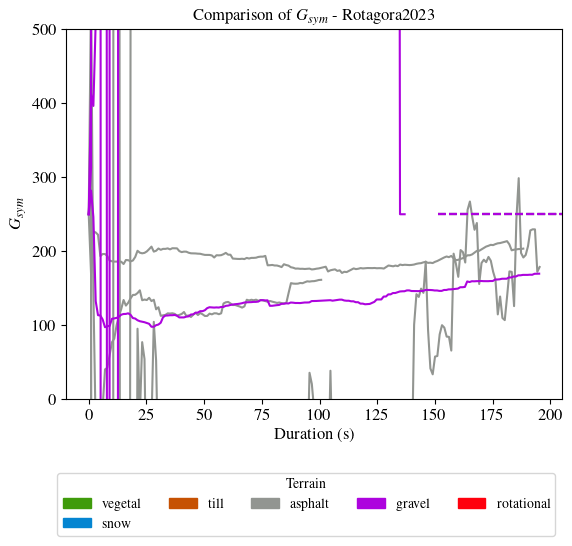

In [7]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    col = "r" if abbr in highlighted_abbrs else col
    ax.plot(dfs[abbr].time_rel, dfs[abbr].G_sym, col, label=abbr)
    ax.axhline(xmin=0.75,y=goradfs[abbr].G_sym.iloc[0],color=col,linestyle='--')

ax.set_ylim((0, 500))
add_terrain_legend(fig, highlighted=["rotational"])
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$G_{sym}$")
ax.set_title(f"Comparison of $G_{{sym}}$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_Gsym.jpg", bbox_inches="tight")

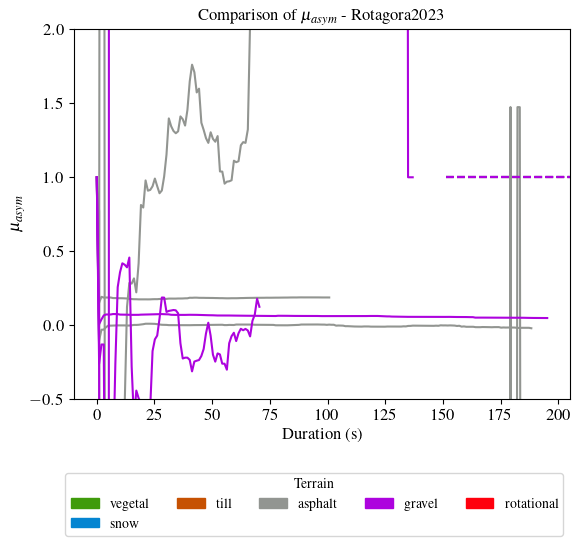

In [8]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    col = "r" if abbr in highlighted_abbrs else col
    ax.plot(dfs[abbr].time_rel, dfs[abbr].m_asym, col, label=abbr)
    ax.axhline(xmin=0.75,y=goradfs[abbr].m_asym.iloc[0],color=col,linestyle='--')
ax.set_ylim((-.5, 2))
add_terrain_legend(fig, highlighted=["rotational"])
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$\mu_{asym}$")
ax.set_title(f"Comparison of $\mu_{{asym}}$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_masym.jpg", bbox_inches="tight")

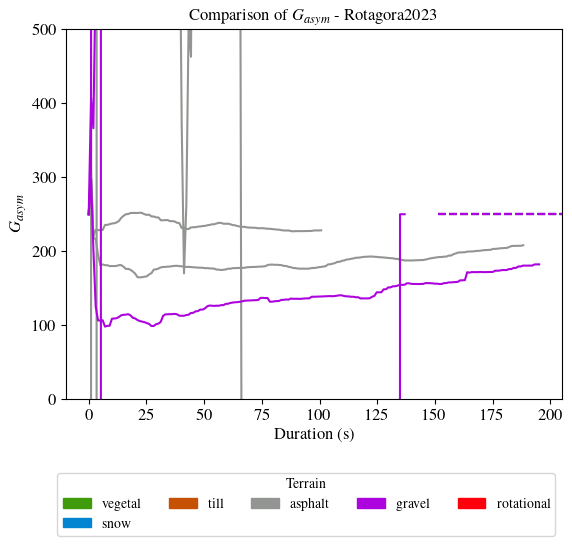

In [9]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    col = "r" if abbr in highlighted_abbrs else col
    ax.plot(dfs[abbr].time_rel, dfs[abbr].G_asym, col, label=abbr)
    ax.axhline(xmin=0.75, y=goradfs[abbr].G_asym.iloc[0], color=col, linestyle="--")
ax.set_ylim((0, 500))
add_terrain_legend(fig, highlighted=["rotational"])
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$G_{asym}$")
ax.set_title(f"Comparison of $G_{{asym}}$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_Gasym.jpg", bbox_inches="tight")
